In [1]:
!pip install pmdarima
from pmdarima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [4]:
nifty = pd.read_csv('/content/niftydata.csv' )
air_pass = pd.read_csv('/content/AirPassengers.csv' )

In [5]:
nifty.columns = ['date','Stock_price']

In [6]:
nifty

,date,Stock_price
0,9/18/2007,4546.200195
1,9/19/2007,4732.350098
2,9/20/2007,4747.549805
3,9/21/2007,4837.549805
4,9/24/2007,4932.200195
...,...,...
2513,11/23/2017,10348.750000
2514,11/24/2017,10389.700200
2515,11/27/2017,10399.549810
2516,11/28/2017,10370.250000


In [7]:
nifty.fillna(method='ffill',inplace=True)

In [8]:
nifty.isnull().sum()

date           0
Stock_price    0
dtype: int64

In [9]:
nifty.date  = pd.to_datetime(nifty['date'])

In [10]:
nifty.head()

,date,Stock_price
0,2007-09-18,4546.200195
1,2007-09-19,4732.350098
2,2007-09-20,4747.549805
3,2007-09-21,4837.549805
4,2007-09-24,4932.200195


In [11]:
nifty.set_index('date',inplace=True)

In [12]:
nifty.index.freq = 'B'

ValueError: ignored

In [13]:
train = nifty.iloc[:-100]
test = nifty.iloc[-100:]

<Axes: xlabel='date'>

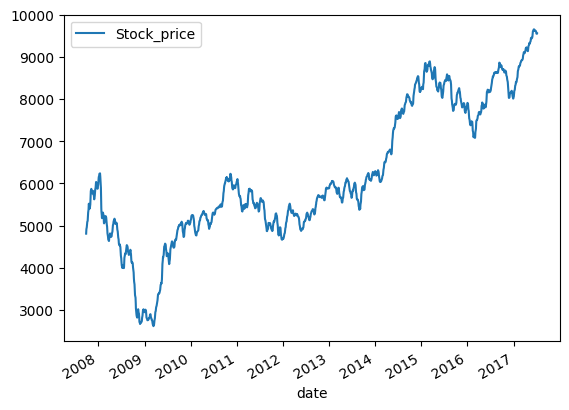

In [14]:
train.rolling(window=7).mean().plot()

In [15]:
train.isnull().sum()

Stock_price    0
dtype: int64

In [16]:
pd.date_range(start='2007-09-18',end ='2007-12-31', freq='B')

DatetimeIndex(['2007-09-18', '2007-09-19', '2007-09-20', '2007-09-21',
               '2007-09-24', '2007-09-25', '2007-09-26', '2007-09-27',
               '2007-09-28', '2007-10-01', '2007-10-02', '2007-10-03',
               '2007-10-04', '2007-10-05', '2007-10-08', '2007-10-09',
               '2007-10-10', '2007-10-11', '2007-10-12', '2007-10-15',
               '2007-10-16', '2007-10-17', '2007-10-18', '2007-10-19',
               '2007-10-22', '2007-10-23', '2007-10-24', '2007-10-25',
               '2007-10-26', '2007-10-29', '2007-10-30', '2007-10-31',
               '2007-11-01', '2007-11-02', '2007-11-05', '2007-11-06',
               '2007-11-07', '2007-11-08', '2007-11-09', '2007-11-12',
               '2007-11-13', '2007-11-14', '2007-11-15', '2007-11-16',
               '2007-11-19', '2007-11-20', '2007-11-21', '2007-11-22',
               '2007-11-23', '2007-11-26', '2007-11-27', '2007-11-28',
               '2007-11-29', '2007-11-30', '2007-12-03', '2007-12-04',
      

In [17]:
train.index.freq = 'B'

ValueError: ignored

In [18]:
train.index.freq = 'D'

ValueError: ignored

In [19]:
decom = seasonal_decompose(test)

ValueError: ignored

In [20]:
air_pass.Month = pd.to_datetime(air_pass.Month)
air_pass.set_index('Month',inplace=True)

In [21]:
air_pass.rename(columns={'#Passengers':'passengers'},inplace=True)

In [22]:
air_pass

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [23]:
train = air_pass.iloc[:-24]
test = air_pass.iloc[-24:]

In [24]:
model_arima=  auto_arima(train, start_p=1, start_q=1,d=1,start_P=1,start_Q=1,D=1,m=12)

In [25]:
model_arima=  auto_arima(train,p=2,d=1, D=1,m=12)

In [26]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -399.641
Date:                            Fri, 21 Apr 2023   AIC                            803.281
Time:                                    14:28:35   BIC                            808.627
Sample:                                01-01-1949   HQIC                           805.448
                                     - 12-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2397      0.091     -2.629      0.009      -0.418      -0.061
sigma2       102.6681     12.363      8.304      0.000      78.437     126.899
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.93   Prob(JB):                         0.38
Heteroskedasticity (H):               1.42   Skew:                             0.02
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
model_arima.predict(24)

1959-01-01    341.958954
1959-02-01    319.729056
1959-03-01    363.784171
1959-04-01    349.770958
1959-05-01    364.774126
1959-06-01    436.773366
1959-07-01    492.773548
1959-08-01    506.773505
1959-09-01    405.773515
1959-10-01    360.773513
1959-11-01    311.773513
1959-12-01    338.773513
1960-01-01    343.732467
1960-02-01    321.502569
1960-03-01    365.557684
1960-04-01    351.544471
1960-05-01    366.547639
1960-06-01    438.546879
1960-07-01    494.547061
1960-08-01    508.547018
1960-09-01    407.547028
1960-10-01    362.547025
1960-11-01    313.547026
1960-12-01    340.547026
Freq: MS, dtype: float64

In [28]:
test['pred'] = model_arima.predict(24)

<ipython-input-28-eefc3803486a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = model_arima.predict(24)


<Axes: xlabel='Month'>

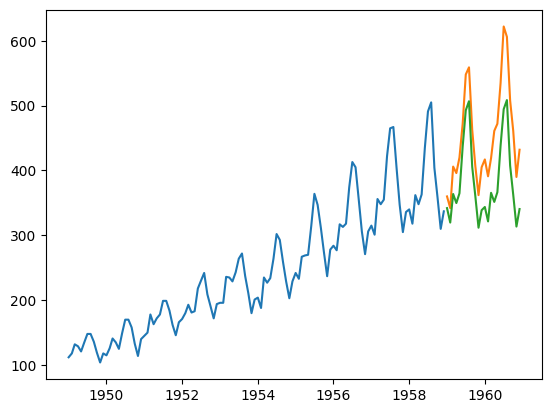

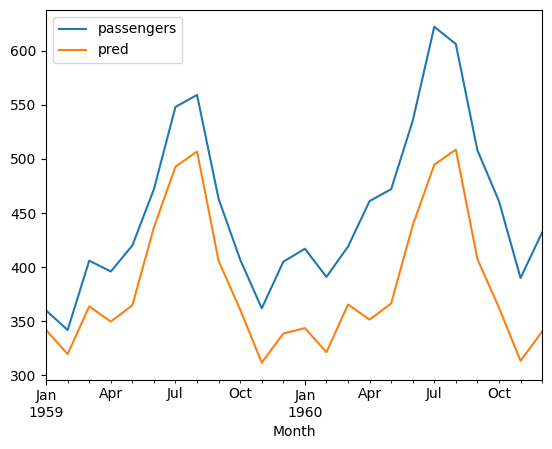

In [29]:
import matplotlib.pyplot as plt
plt.plot(train)
plt.plot(test)
test.plot()

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

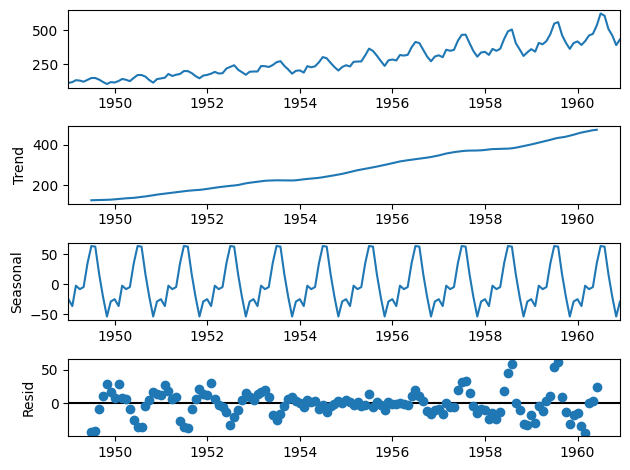

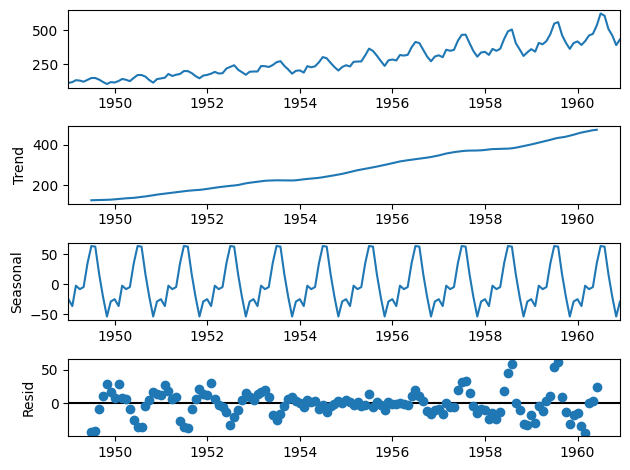

In [31]:
decom = seasonal_decompose(air_pass)
decom.plot()

In [35]:
holt_winter = ExponentialSmoothing(air_pass.iloc[:-12], trend='add', seasonal='mul')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [36]:
model_holt = holt_winter.fit()

In [43]:
result  = model_holt.forecast(36)

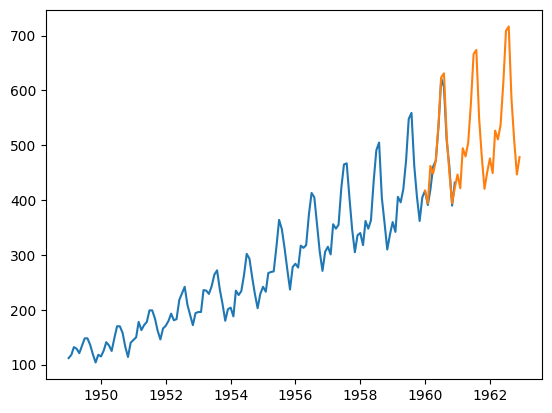

In [44]:

plt.plot(air_pass)
plt.plot(result)
plt.show()

In [45]:
from prophet import Prophet

In [51]:
air_pass = air_pass.reset_index()
air_pass.rename(columns={'Month':'dS','passengers':'y'},inplace=True)

In [56]:
air_pass.rename(columns={'DS':'ds','Y':'y'},inplace=True)

In [57]:
model_p = Prophet().fit(air_pass)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0nwns9h/s6pwy9bx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0nwns9h/xlv2vtsw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17969', 'data', 'file=/tmp/tmpw0nwns9h/s6pwy9bx.json', 'init=/tmp/tmpw0nwns9h/xlv2vtsw.json', 'output', 'file=/tmp/tmpw0nwns9h/prophet_modelexxvskph/prophet_model-20230421145653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [58]:
future = model_p.make_future_dataframe(periods=24)
future.tail()

,ds
163,1960-12-21
164,1960-12-22
165,1960-12-23
166,1960-12-24
167,1960-12-25


In [60]:
predict = model_p.predict(future)

<Axes: >

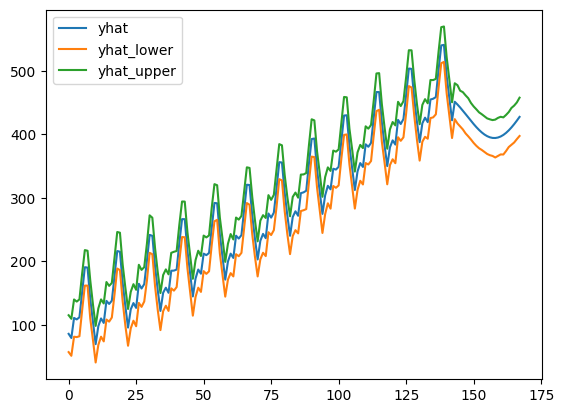

In [62]:
predict[[ 'yhat', 'yhat_lower', 'yhat_upper']].plot()

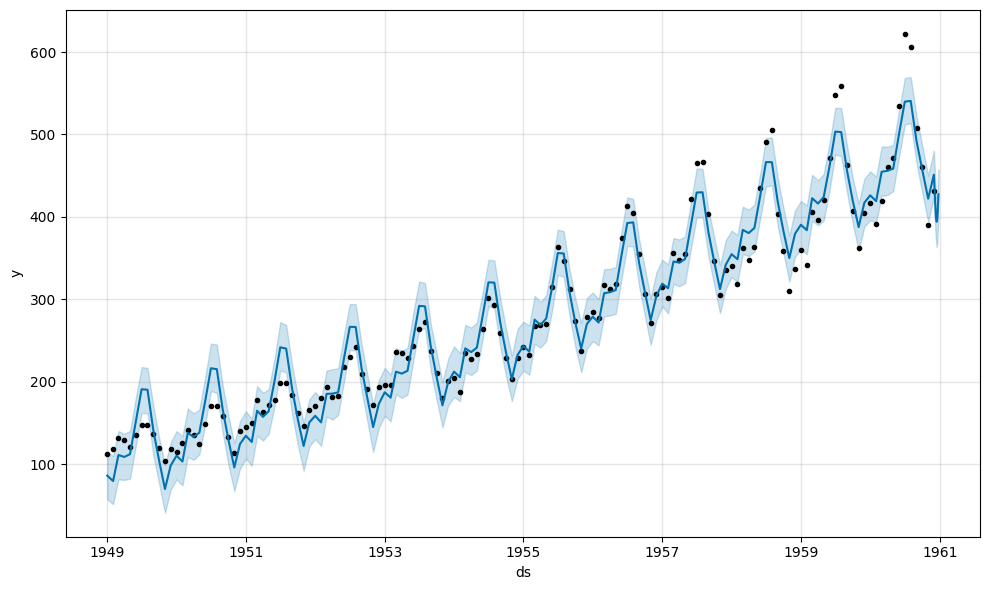

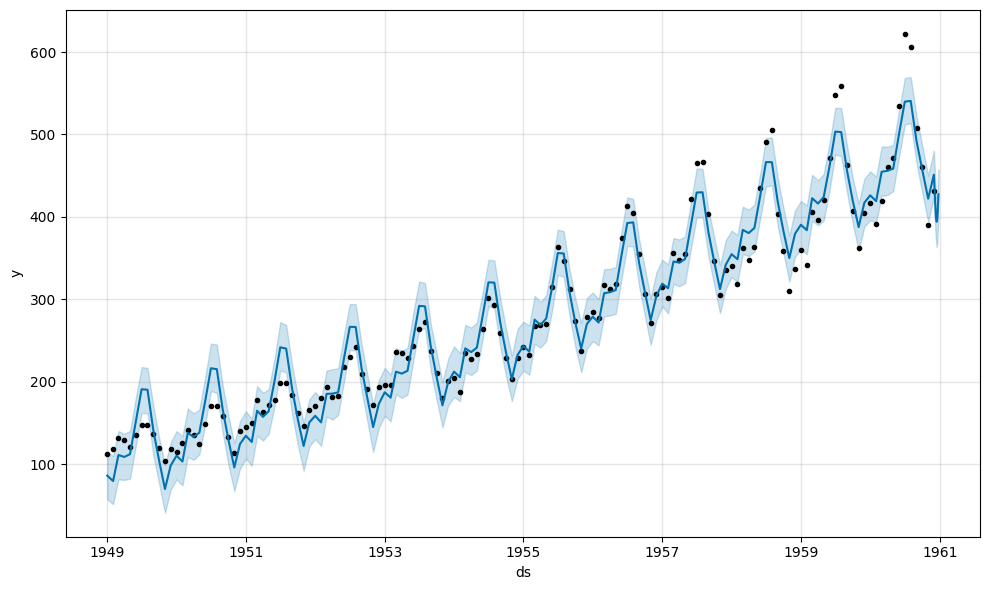

In [63]:
model_p.plot(predict)